In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score



In [2]:
df=pd.read_csv('car_price.csv')
df

,Engine_Size,Horsepower,Age,Mileage,Brand_Rating,Price
0,3.17,228,3,79895,2.09,-586.62
1,2.11,221,10,63977,1.51,-448.13
2,2.70,264,14,7265,3.91,143.04
3,4.38,153,6,198296,1.95,-1705.44
4,1.02,299,7,123556,2.92,-1067.92
...,...,...,...,...,...,...
795,3.14,124,8,41938,4.00,-206.79
796,2.86,392,13,10102,4.18,196.73
797,4.07,110,8,173399,4.55,-1482.20
798,4.55,347,8,138746,4.66,-1008.61


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i]) 
df

,Engine_Size,Horsepower,Age,Mileage,Brand_Rating,Price
0,3.17,228,3,79895,2.09,-586.62
1,2.11,221,10,63977,1.51,-448.13
2,2.70,264,14,7265,3.91,143.04
3,4.38,153,6,198296,1.95,-1705.44
4,1.02,299,7,123556,2.92,-1067.92
...,...,...,...,...,...,...
795,3.14,124,8,41938,4.00,-206.79
796,2.86,392,13,10102,4.18,196.73
797,4.07,110,8,173399,4.55,-1482.20
798,4.55,347,8,138746,4.66,-1008.61


In [4]:
x=df.drop(columns=["Price"])
y=df["Price"]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
y_pred=model.predict(x_test)
y_pred

array([-1620.1178, -1259.6386, -1447.0356, -1660.6686, -1557.8384,
        -988.9535,  -589.5688, -1263.6672,  -317.3851, -1063.6728,
       -1041.1863, -1320.9147,  -658.2169,   -60.5314,   178.704 ,
       -1316.098 , -1470.2456, -1313.807 , -1366.4948,  -672.7686,
       -1072.3542, -1409.3941, -1211.6682, -1528.2831, -1305.65  ,
        -194.9536, -1170.182 ,    29.8034,    23.2491, -1440.0439,
       -1270.2187,    73.8206,  -702.915 ,  -783.2269,  -597.1081,
        -911.164 ,  -625.9553,  -696.9701,   138.9212,   -16.5746,
          88.7878,   -67.2795,   -53.9988, -1638.8833, -1082.5196,
        -954.3196,  -264.3895, -1084.4999,   178.7901, -1663.1118,
         110.682 , -1616.9573, -1320.4327,  -272.1289, -1740.475 ,
       -1419.5464, -1666.8932,  -947.134 , -1090.0578,  -761.5548,
        -516.6062,  -481.4828,    98.4641, -1124.9234, -1600.4353,
       -1676.6447,    15.7876,  -609.2905,    96.4064,  -872.7375,
        -608.4788, -1005.0883,  -193.4804,  -985.5293,  -886.3

In [8]:
# mse=mean_squared_error(y_test,y_pred)
# print(f'mean Squared Error:{mse}')
# rmse=np.sqrt(mse)
# print(f'Root Mean Squared Error:{rmse}')

In [9]:
# score=r2_score(y_test,y_pred)
# score

In [10]:
print("R2 Score:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print("RMSE:",RMSE)

R2 Score: 0.995642903024659
MSE: 1482.819259176696
RMSE: 38.50739226663753


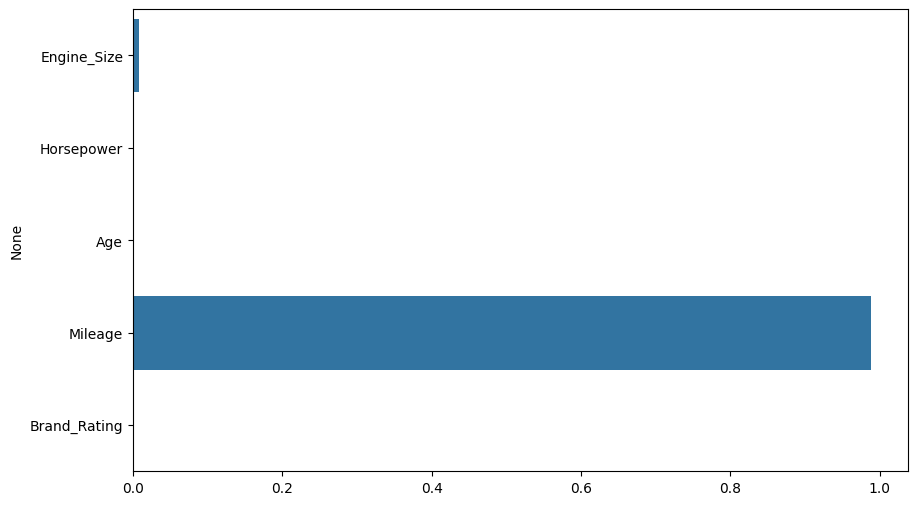

In [11]:
plt.figure(figsize=[10,6])
sns.barplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [12]:
new_data=pd.DataFrame({
    "Engine_Size":[3.11],
    "Horsepower":[225],
    "Age":[6],
    "Mileage":[79880],
    "Brand_Rating":[3.09],
 
})
predict=model.predict(new_data)
predict

array([-552.2711])